# 이상 거래 패턴 탐지 - 탐색적 데이터 분석 (EDA)

## 목적
- 5개 CSV 파일(Trade, Funding, Reward, IP, Spec)에 대한 기본 통계 및 시각화
- 데이터 품질 확인 (결측치, 이상치, 중복)
- 이상 거래 패턴 초기 탐색

## 1. 라이브러리 임포트 및 설정

In [1]:
# !pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Mac)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# pandas 출력 옵션
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

print("라이브러리 임포트 완료!")

라이브러리 임포트 완료!


In [3]:
# !pip install pandas

## 2. 데이터 로딩

In [4]:
# 데이터 경로 설정
DATA_PATH = 'data/'

print("데이터 로딩 시작...")
print("=" * 50)

# Trade 데이터
print("Trade.csv 로딩 중...")
trade_df = pd.read_csv(DATA_PATH + 'Trade.csv')
trade_df['ts'] = pd.to_datetime(trade_df['ts'])
print(f"✓ Trade: {len(trade_df):,} rows loaded")

# Funding 데이터
print("Funding.csv 로딩 중...")
funding_df = pd.read_csv(DATA_PATH + 'Funding.csv')
funding_df['ts'] = pd.to_datetime(funding_df['ts'])
print(f"✓ Funding: {len(funding_df):,} rows loaded")

# Reward 데이터
print("Reward.csv 로딩 중...")
reward_df = pd.read_csv(DATA_PATH + 'Reward.csv')
reward_df['ts'] = pd.to_datetime(reward_df['ts'])
print(f"✓ Reward: {len(reward_df):,} rows loaded")

# IP 데이터
print("IP.csv 로딩 중...")
ip_df = pd.read_csv(DATA_PATH + 'IP.csv')
print(f"✓ IP: {len(ip_df):,} rows loaded")

# Spec 데이터
print("Spec.csv 로딩 중...")
spec_df = pd.read_csv(DATA_PATH + 'Spec.csv')
spec_df['day'] = pd.to_datetime(spec_df['day'])
print(f"✓ Spec: {len(spec_df):,} rows loaded")

print("=" * 50)
print("모든 데이터 로딩 완료!")

데이터 로딩 시작...
Trade.csv 로딩 중...
✓ Trade: 52,953 rows loaded
Funding.csv 로딩 중...
✓ Funding: 52,694 rows loaded
Reward.csv 로딩 중...
✓ Reward: 198 rows loaded
IP.csv 로딩 중...
✓ IP: 2,231 rows loaded
Spec.csv 로딩 중...
✓ Spec: 98,207 rows loaded
모든 데이터 로딩 완료!


## 3. 기본 정보 확인

### 3.1 Trade 데이터

In [ ]:
print("TRADE 데이터 기본 정보")
print("=" * 80)
print(f"데이터 형태: {trade_df.shape}")
print(f"기간: {trade_df['ts'].min()} ~ {trade_df['ts'].max()}")
print(f"총 거래일수: {(trade_df['ts'].max() - trade_df['ts'].min()).days} 일")
print(f"고유 계정 수: {trade_df['account_id'].nunique():,}")
print(f"거래 종목 수: {trade_df['symbol'].nunique()}")
print(f"고유 포지션 수: {trade_df['position_id'].nunique():,}")
print()

trade_df.info()

🔍 TRADE 데이터 기본 정보
데이터 형태: (52953, 10)
기간: 2025-03-01 00:04:14.329767 ~ 2025-10-31 20:00:38.588185
총 거래일수: 244 일
고유 계정 수: 63
거래 종목 수: 401
고유 포지션 수: 24,385

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52953 entries, 0 to 52952
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   account_id   52953 non-null  object        
 1   ts           52953 non-null  datetime64[ns]
 2   symbol       52953 non-null  object        
 3   side         52953 non-null  object        
 4   openclose    52953 non-null  object        
 5   position_id  52953 non-null  object        
 6   leverage     52953 non-null  int64         
 7   price        52953 non-null  float64       
 8   qty          52953 non-null  float64       
 9   amount       52953 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 4.0+ MB


In [ ]:
# 기본 통계
print("\n Trade 데이터 기초 통계")
trade_df.describe()


📊 Trade 데이터 기초 통계


,ts,leverage,price,qty,amount
count,52953,52953.000000,52953.000000,52953.000000,52953.000000
mean,2025-06-08 05:28:14.281319424,10.593810,45246.477274,71212.765456,34017.991558
min,2025-03-01 00:04:14.329767,0.000000,0.000035,0.000008,0.103900
25%,2025-05-06 07:49:40.564528128,0.000000,1.386100,0.096174,359.981300
50%,2025-06-10 22:24:31.544058112,1.000000,2574.400000,1.148760,7931.628167
75%,2025-07-03 13:30:32.641113088,10.000000,104129.800000,152.760000,19823.241488
max,2025-10-31 20:00:38.588185,100.000000,126111.500000,100000000.000000,2374844.000000
std,NaN,22.913614,50704.846773,1061701.250903,102306.352524


In [ ]:
# 결측치 확인
print("\n Trade 데이터 결측치")
missing = trade_df.isnull().sum()
missing_pct = (missing / len(trade_df) * 100).round(2)
missing_df = pd.DataFrame({'결측치 수': missing, '비율(%)': missing_pct})
print(missing_df[missing_df['결측치 수'] > 0])


🔍 Trade 데이터 결측치
Empty DataFrame
Columns: [결측치 수, 비율(%)]
Index: []


In [ ]:
# 샘플 데이터
print("\n Trade 데이터 샘플 (최근 10개)")
trade_df.sort_values('ts', ascending=False).head(10)


📝 Trade 데이터 샘플 (최근 10개)


,account_id,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
52952,A_d444580218,2025-10-31 20:00:38.588185,VELODROMEUSDT.PERP,LONG,CLOSE,P_549a14c21c,0,0.042280,170011.000000,7188.065080
52951,A_f96ede8d34,2025-10-31 20:00:38.559155,VELODROMEUSDT.PERP,LONG,CLOSE,P_8ec085ef96,0,0.042280,283353.000000,11980.164840
52950,A_d444580218,2025-10-31 19:58:19.605461,VELODROMEUSDT.PERP,LONG,OPEN,P_549a14c21c,10,0.042350,170011.000000,7199.965850
52949,A_f96ede8d34,2025-10-31 19:58:19.592943,VELODROMEUSDT.PERP,LONG,OPEN,P_8ec085ef96,10,0.042350,283353.000000,11999.999550
52948,A_d444580218,2025-10-31 19:57:56.912556,ASRUSDT.PERP,LONG,CLOSE,P_76caf567c6,0,1.781000,4060.900000,7232.462900
52947,A_f96ede8d34,2025-10-31 19:57:56.906422,ASRUSDT.PERP,LONG,CLOSE,P_fccfc6c5fc,0,1.781000,6768.100000,12053.986100
52946,A_d444580218,2025-10-31 19:57:11.054241,ASRUSDT.PERP,LONG,OPEN,P_76caf567c6,10,1.773000,4060.900000,7199.975700
52945,A_f96ede8d34,2025-10-31 19:57:11.033994,ASRUSDT.PERP,LONG,OPEN,P_fccfc6c5fc,10,1.773000,6768.100000,11999.841300
52944,A_2db64f326b,2025-10-31 18:19:26.157587,BTCUSDT.PERP,LONG,CLOSE,P_c4edb13edc,0,109207.100000,1.000000,109207.100000
52943,A_2db64f326b,2025-10-31 17:52:50.832106,BTCUSDT.PERP,LONG,OPEN,P_c4edb13edc,4,109334.200000,1.000000,109334.200000


### 3.2 Funding 데이터

In [ ]:
print(" FUNDING 데이터 기본 정보")
print("=" * 80)
print(f"데이터 형태: {funding_df.shape}")
print(f"기간: {funding_df['ts'].min()} ~ {funding_df['ts'].max()}")
print(f"고유 계정 수: {funding_df['account_id'].nunique():,}")
print(f"총 펀딩 수취액: ${funding_df[funding_df['funding_fee'] > 0]['funding_fee'].sum():,.2f}")
print(f"총 펀딩 지불액: ${abs(funding_df[funding_df['funding_fee'] < 0]['funding_fee'].sum()):,.2f}")
print()

funding_df.info()

🔍 FUNDING 데이터 기본 정보
데이터 형태: (52694, 4)
기간: 2025-03-01 00:00:00.348937 ~ 2025-10-31 23:00:00.035064
고유 계정 수: 60
총 펀딩 수취액: $218,923.71
총 펀딩 지불액: $205,588.66

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52694 entries, 0 to 52693
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   account_id   52694 non-null  object        
 1   ts           52694 non-null  datetime64[ns]
 2   fee_rate     52694 non-null  float64       
 3   funding_fee  52694 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.6+ MB


In [ ]:
print("\n Funding 데이터 기초 통계")
funding_df.describe()


📊 Funding 데이터 기초 통계


,ts,fee_rate,funding_fee
count,52694,52694.000000,52694.000000
mean,2025-06-14 15:47:22.565572096,-0.000149,0.253066
min,2025-03-01 00:00:00.348937,-0.030000,-1522.902563
25%,2025-05-02 00:00:01.025658112,0.000013,-0.047956
50%,2025-06-11 00:30:00.231820544,0.000050,0.001124
75%,2025-07-18 16:00:00.296051968,0.000100,0.510445
max,2025-10-31 23:00:00.035064,0.020000,1928.099676
std,NaN,0.001432,45.168678


In [ ]:
print("\n Funding 데이터 샘플 (최근 10개)")
funding_df.sort_values('ts', ascending=False).head(10)


📝 Funding 데이터 샘플 (최근 10개)


,account_id,ts,fee_rate,funding_fee
52693,A_522c68dd44,2025-10-31 23:00:00.035064,-0.000060,-0.008884
52692,A_522c68dd44,2025-10-31 22:00:00.030097,-0.000105,-0.015442
52691,A_522c68dd44,2025-10-31 21:00:00.056495,-0.000055,-0.008056
52690,A_d444580218,2025-10-31 20:00:00.544234,-0.002426,-17.463466
52689,A_f96ede8d34,2025-10-31 20:00:00.544234,-0.002426,-29.105914
52688,A_3943c4c480,2025-10-31 20:00:00.525294,0.000050,0.000046
52687,A_f96ede8d34,2025-10-31 20:00:00.525293,0.000058,0.000074
52686,A_f96ede8d34,2025-10-31 20:00:00.525293,0.000058,0.013358
52685,A_f96ede8d34,2025-10-31 20:00:00.452946,0.000057,-0.000341
52684,A_2db64f326b,2025-10-31 20:00:00.320457,-0.000073,0.100345


### 3.3 Reward 데이터

In [ ]:
print(" REWARD 데이터 기본 정보")
print("=" * 80)
print(f"데이터 형태: {reward_df.shape}")
print(f"기간: {reward_df['ts'].min()} ~ {reward_df['ts'].max()}")
print(f"고유 계정 수: {reward_df['account_id'].nunique():,}")
print(f"총 보상액: ${reward_df['reward_amount'].sum():,.2f}")
print(f"평균 보상액: ${reward_df['reward_amount'].mean():,.2f}")
print(f"최대 보상액: ${reward_df['reward_amount'].max():,.2f}")
print()

reward_df.info()

🔍 REWARD 데이터 기본 정보
데이터 형태: (198, 3)
기간: 2025-01-02 08:14:06.194179 ~ 2025-09-10 09:18:34.454018
고유 계정 수: 49
총 보상액: $7,713.75
평균 보상액: $38.96
최대 보상액: $749.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   account_id     198 non-null    object        
 1   ts             198 non-null    datetime64[ns]
 2   reward_amount  198 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
print("\n Reward 데이터 기초 통계")
reward_df.describe()


📊 Reward 데이터 기초 통계


,ts,reward_amount
count,198,198.000000
mean,2025-04-04 06:49:12.904670720,38.958350
min,2025-01-02 08:14:06.194179,0.972508
25%,2025-02-16 17:59:34.228003840,7.050416
50%,2025-03-27 10:31:28.221929472,10.000000
75%,2025-05-11 20:54:56.303488512,38.000000
max,2025-09-10 09:18:34.454018,749.994013
std,NaN,81.068189


### 3.4 IP 데이터

In [ ]:
print(" IP 데이터 기본 정보")
print("=" * 80)
print(f"데이터 형태: {ip_df.shape}")
print(f"고유 계정 수: {ip_df['account_id'].nunique():,}")
print(f"고유 IP 수: {ip_df['ip'].nunique():,}")
print()

ip_df.info()

🔍 IP 데이터 기본 정보
데이터 형태: (2231, 2)
고유 계정 수: 63
고유 IP 수: 2,221

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account_id  2231 non-null   object
 1   ip          2231 non-null   object
dtypes: object(2)
memory usage: 35.0+ KB


In [ ]:
# 동일 IP 사용 계정 탐색
ip_counts = ip_df.groupby('ip')['account_id'].count().sort_values(ascending=False)
print("\n 동일 IP 사용 계정 수 (Top 10)")
print(ip_counts.head(10))


🚨 동일 IP 사용 계정 수 (Top 10)
ip
72.35.190.19       3
54.132.225.149     2
208.29.138.40      2
194.23.90.110      2
107.249.78.206     2
192.167.6.144      2
44.180.24.95       2
177.237.144.102    2
53.162.59.233      2
26.82.204.95       1
Name: account_id, dtype: int64


### 3.5 Spec 데이터

In [16]:
print("🔍 SPEC 데이터 기본 정보")
print("=" * 80)
print(f"데이터 형태: {spec_df.shape}")
print(f"거래 종목 수: {spec_df['symbol'].nunique()}")
print()

spec_df.info()

🔍 SPEC 데이터 기본 정보
데이터 형태: (98207, 4)
거래 종목 수: 546

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98207 entries, 0 to 98206
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   symbol            98207 non-null  object        
 1   day               98207 non-null  datetime64[ns]
 2   funding_interval  98207 non-null  int64         
 3   max_order_amount  98207 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.0+ MB


In [ ]:
print("\n Spec 데이터 기초 통계")
spec_df.describe()


📊 Spec 데이터 기초 통계


,day,funding_interval,max_order_amount
count,98207,98207.000000,98207.000000
mean,2025-07-10 23:25:21.972975104,5.340281,160222.529962
min,2025-03-01 00:00:00,1.000000,5000.000000
25%,2025-05-10 00:00:00,4.000000,20000.000000
50%,2025-07-15 00:00:00,4.000000,30000.000000
75%,2025-09-16 00:00:00,8.000000,80000.000000
max,2025-10-31 00:00:00,8.000000,5000000.000000
std,NaN,1.940610,451710.366706


In [ ]:
print("\n Spec 데이터 샘플 (10개)")
spec_df.head(10)


📝 Spec 데이터 샘플 (10개)


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01,4,75000.000000
1,MOVEUSDT.PERP,2025-03-01,4,75000.000000
2,SXPUSDT.PERP,2025-03-01,8,75000.000000
3,PONKEUSDT.PERP,2025-03-01,4,20000.000000
4,KDAUSDT.PERP,2025-03-01,4,20000.000000
5,ENJUSDT.PERP,2025-03-01,8,20000.000000
6,AEVOUSDT.PERP,2025-03-01,4,75000.000000
7,ETHUSDT.PERP,2025-03-01,8,2500000.000000
8,ICXUSDT.PERP,2025-03-01,8,50000.000000
9,LOKAUSDT.PERP,2025-03-01,4,20000.000000


## 4. 시각화 분석

### 4.1 Trade 데이터 시각화

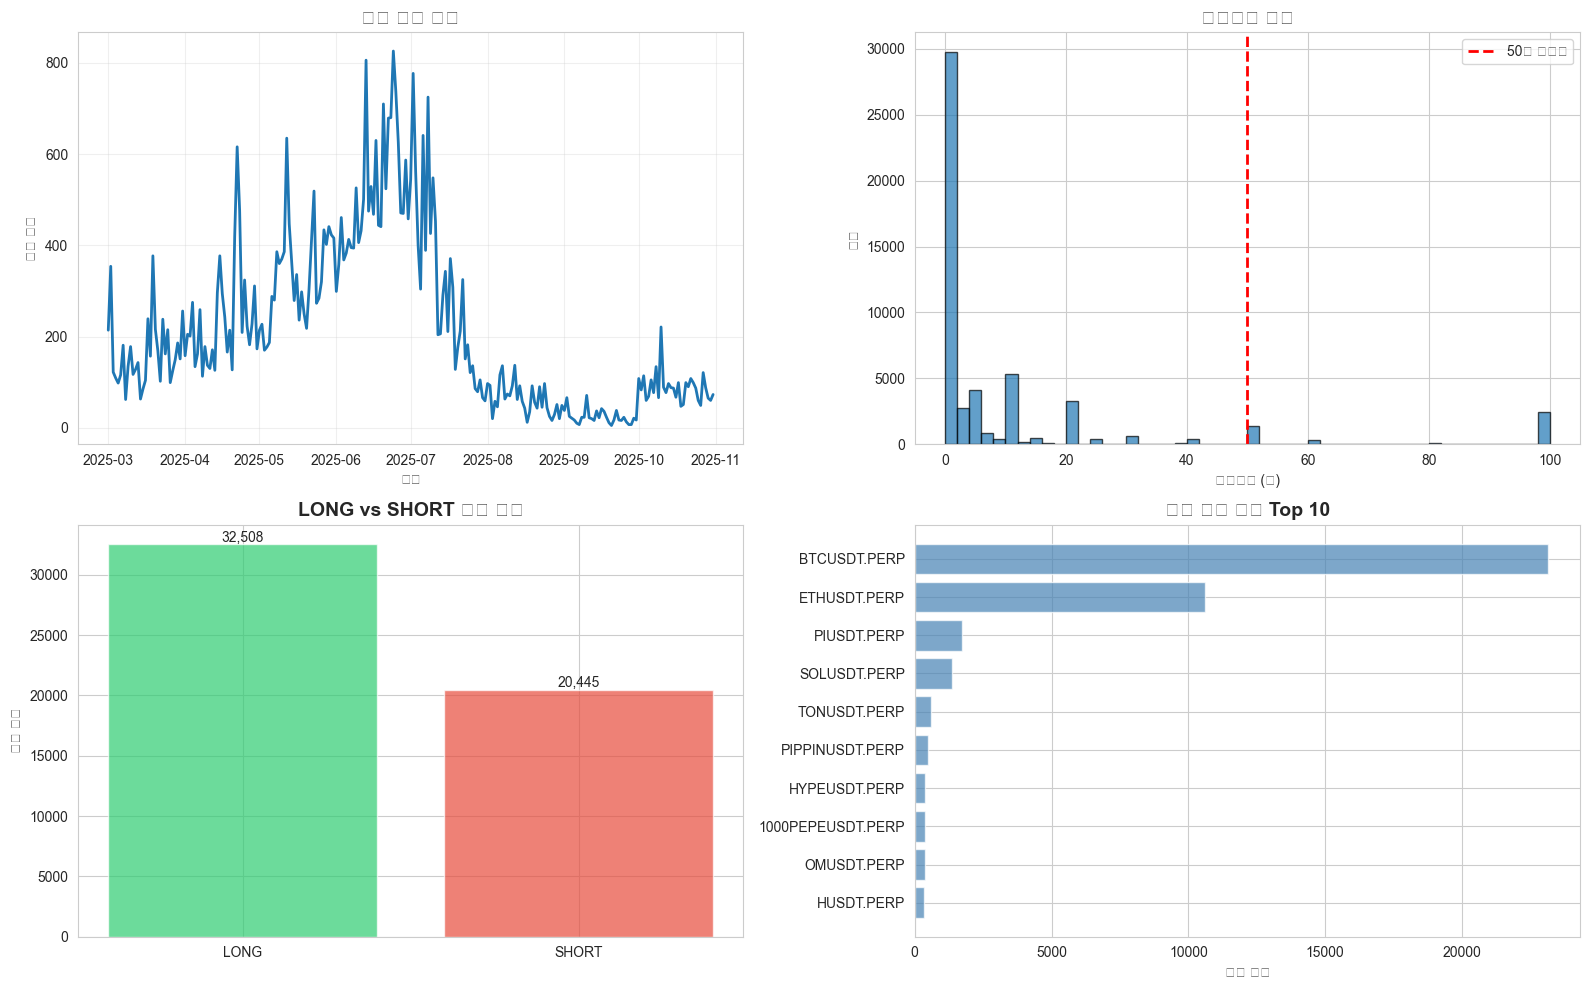

In [19]:
# 거래량 시계열
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 일별 거래 건수
daily_trades = trade_df.groupby(trade_df['ts'].dt.date).size()
axes[0, 0].plot(daily_trades.index, daily_trades.values, linewidth=2)
axes[0, 0].set_title('일별 거래 건수', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('날짜')
axes[0, 0].set_ylabel('거래 건수')
axes[0, 0].grid(True, alpha=0.3)

# 레버리지 분포
axes[0, 1].hist(trade_df['leverage'].clip(0, 100), bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('레버리지 분포', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('레버리지 (배)')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].axvline(50, color='red', linestyle='--', linewidth=2, label='50배 기준선')
axes[0, 1].legend()

# Side 분포 (LONG vs SHORT)
side_counts = trade_df['side'].value_counts()
axes[1, 0].bar(side_counts.index, side_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 0].set_title('LONG vs SHORT 거래 분포', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('거래 건수')
for i, v in enumerate(side_counts.values):
    axes[1, 0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)

# 상위 거래 종목
top_symbols = trade_df['symbol'].value_counts().head(10)
axes[1, 1].barh(range(len(top_symbols)), top_symbols.values, color='steelblue', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_symbols)))
axes[1, 1].set_yticklabels(top_symbols.index)
axes[1, 1].set_title('상위 거래 종목 Top 10', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('거래 건수')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

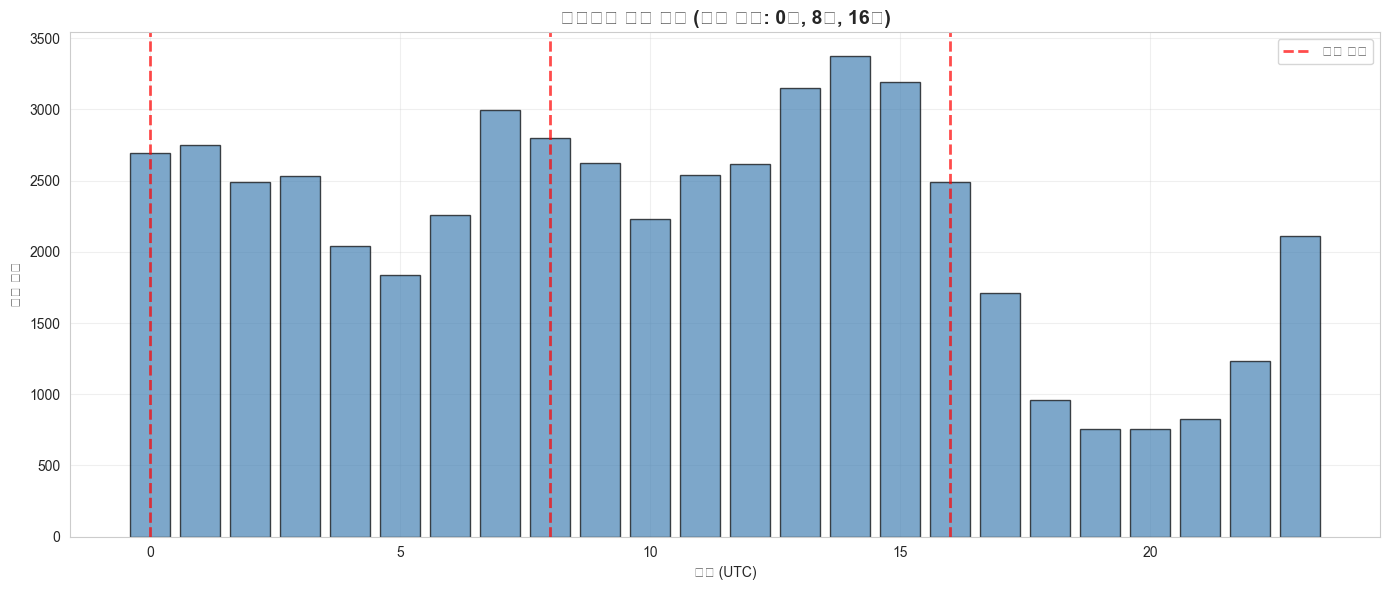

In [20]:
# 시간대별 거래 패턴 (펀딩 시점 확인용)
fig, ax = plt.subplots(figsize=(14, 6))

trade_df['hour'] = trade_df['ts'].dt.hour
hourly_trades = trade_df.groupby('hour').size()

ax.bar(hourly_trades.index, hourly_trades.values, color='steelblue', alpha=0.7, edgecolor='black')
ax.set_title('시간대별 거래 분포 (펀딩 시점: 0시, 8시, 16시)', fontsize=14, fontweight='bold')
ax.set_xlabel('시간 (UTC)')
ax.set_ylabel('거래 건수')
ax.axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='펀딩 시점')
ax.axvline(8, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax.axvline(16, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Funding 데이터 시각화

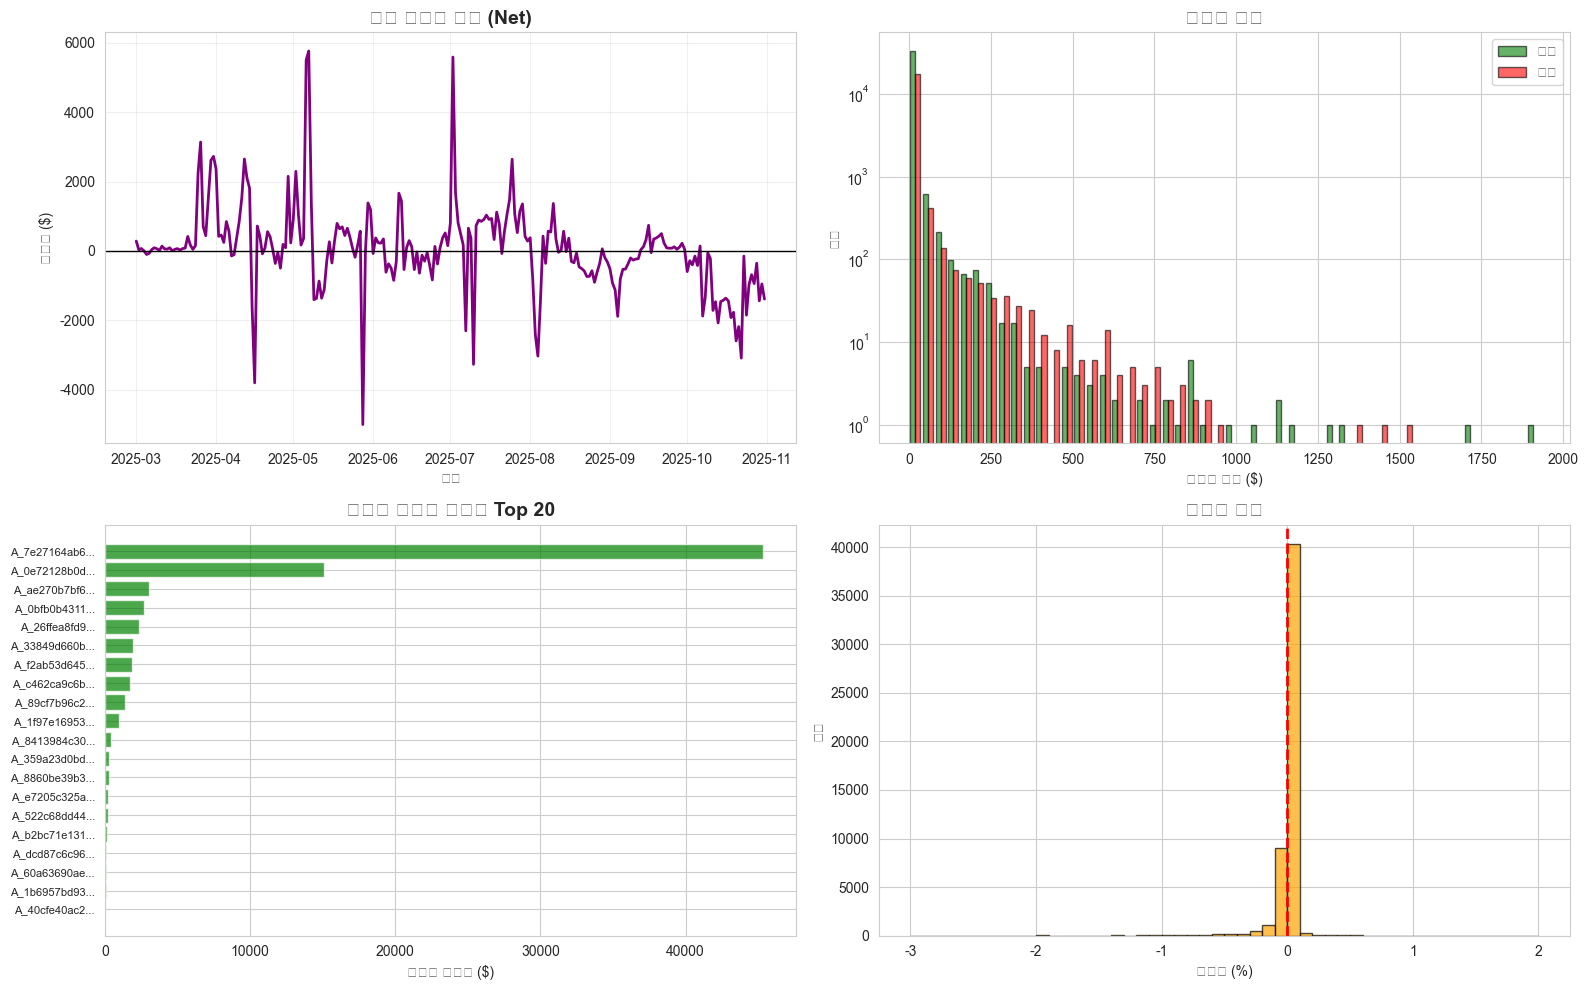

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 일별 펀딩피 총액
daily_funding = funding_df.groupby(funding_df['ts'].dt.date)['funding_fee'].sum()
axes[0, 0].plot(daily_funding.index, daily_funding.values, linewidth=2, color='purple')
axes[0, 0].set_title('일별 펀딩피 총액 (Net)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('날짜')
axes[0, 0].set_ylabel('펀딩피 ($)')
axes[0, 0].axhline(0, color='black', linestyle='-', linewidth=1)
axes[0, 0].grid(True, alpha=0.3)

# 펀딩피 분포 (로그 스케일)
funding_positive = funding_df[funding_df['funding_fee'] > 0]['funding_fee']
funding_negative = funding_df[funding_df['funding_fee'] < 0]['funding_fee'].abs()

axes[0, 1].hist([funding_positive, funding_negative], bins=50, label=['수취', '지불'], 
                color=['green', 'red'], alpha=0.6, edgecolor='black')
axes[0, 1].set_title('펀딩피 분포', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('펀딩피 금액 ($)')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].set_yscale('log')
axes[0, 1].legend()

# 계정별 펀딩피 순수익 Top 20
account_funding = funding_df.groupby('account_id')['funding_fee'].sum().sort_values(ascending=False).head(20)
colors = ['green' if x > 0 else 'red' for x in account_funding.values]
axes[1, 0].barh(range(len(account_funding)), account_funding.values, color=colors, alpha=0.7)
axes[1, 0].set_yticks(range(len(account_funding)))
axes[1, 0].set_yticklabels([acc[:12] + '...' for acc in account_funding.index], fontsize=8)
axes[1, 0].set_title('계정별 펀딩피 순수익 Top 20', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('펀딩피 순수익 ($)')
axes[1, 0].invert_yaxis()

# 펀딩률 분포
axes[1, 1].hist(funding_df['fee_rate'] * 100, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_title('펀딩률 분포', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('펀딩률 (%)')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

### 4.3 Reward 데이터 시각화

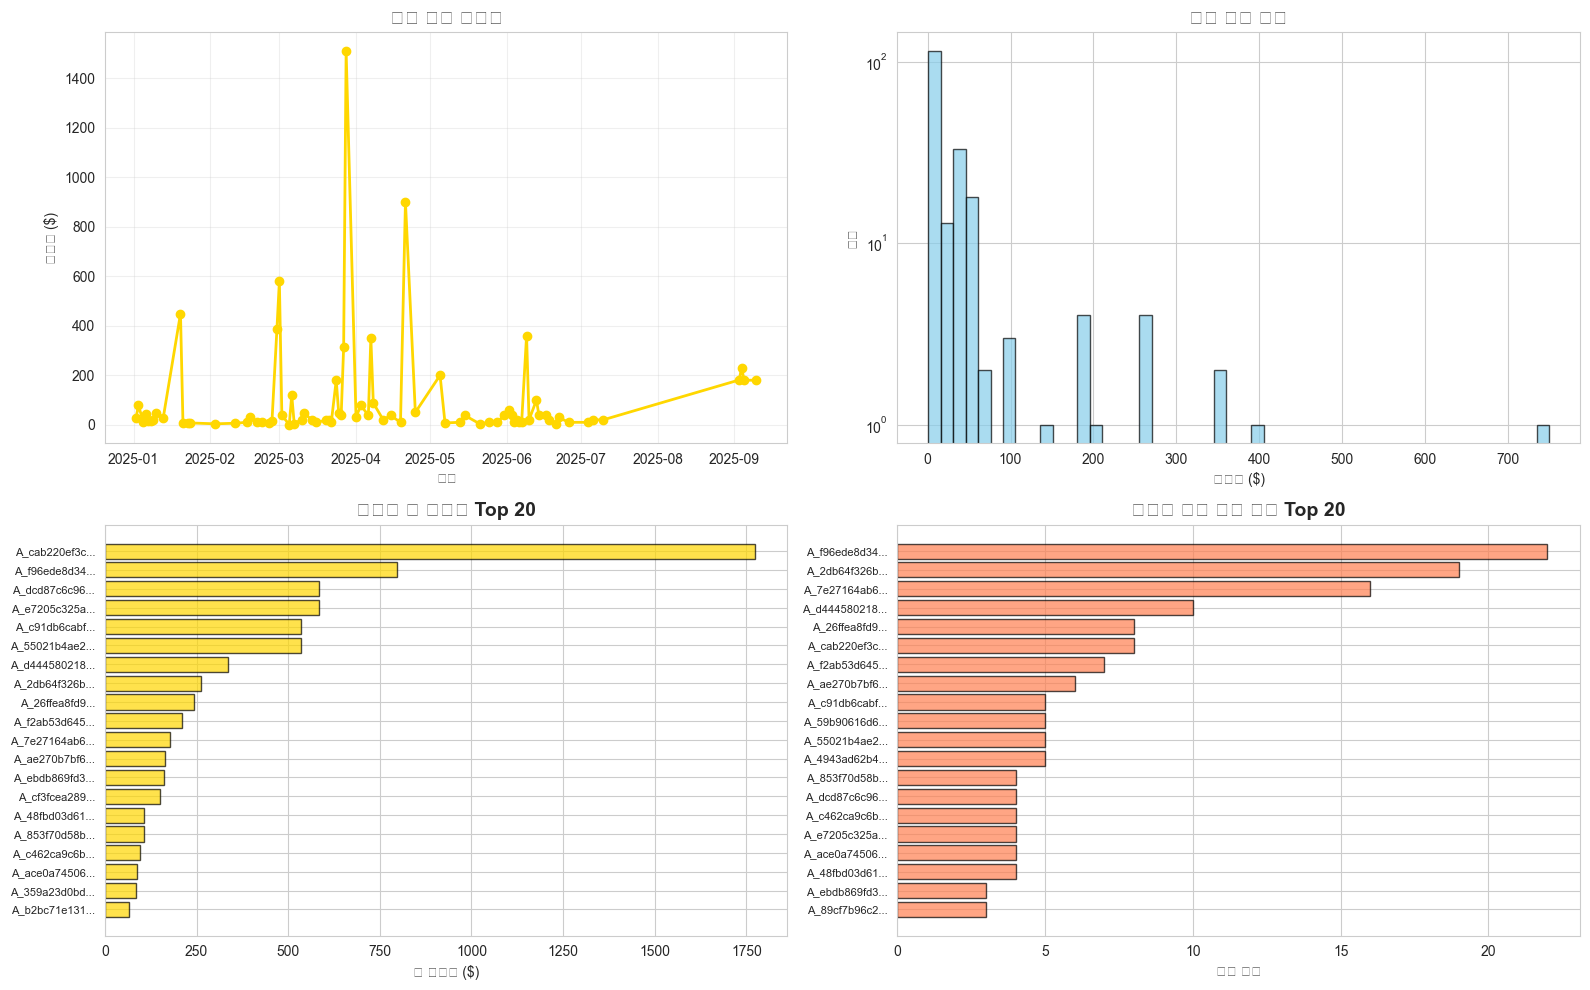

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 일별 보상 지급액
daily_rewards = reward_df.groupby(reward_df['ts'].dt.date)['reward_amount'].sum()
axes[0, 0].plot(daily_rewards.index, daily_rewards.values, linewidth=2, color='gold', marker='o')
axes[0, 0].set_title('일별 보상 지급액', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('날짜')
axes[0, 0].set_ylabel('보상액 ($)')
axes[0, 0].grid(True, alpha=0.3)

# 보상 금액 분포
axes[0, 1].hist(reward_df['reward_amount'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].set_title('보상 금액 분포', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('보상액 ($)')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].set_yscale('log')

# 계정별 총 보상액 Top 20
account_rewards = reward_df.groupby('account_id')['reward_amount'].sum().sort_values(ascending=False).head(20)
axes[1, 0].barh(range(len(account_rewards)), account_rewards.values, color='gold', alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(range(len(account_rewards)))
axes[1, 0].set_yticklabels([acc[:12] + '...' for acc in account_rewards.index], fontsize=8)
axes[1, 0].set_title('계정별 총 보상액 Top 20', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('총 보상액 ($)')
axes[1, 0].invert_yaxis()

# 계정별 보상 수령 횟수 Top 20
account_reward_count = reward_df.groupby('account_id').size().sort_values(ascending=False).head(20)
axes[1, 1].barh(range(len(account_reward_count)), account_reward_count.values, color='coral', alpha=0.7, edgecolor='black')
axes[1, 1].set_yticks(range(len(account_reward_count)))
axes[1, 1].set_yticklabels([acc[:12] + '...' for acc in account_reward_count.index], fontsize=8)
axes[1, 1].set_title('계정별 보상 수령 횟수 Top 20', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('수령 횟수')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

### 4.4 IP 데이터 시각화 (다중 계정 탐지)

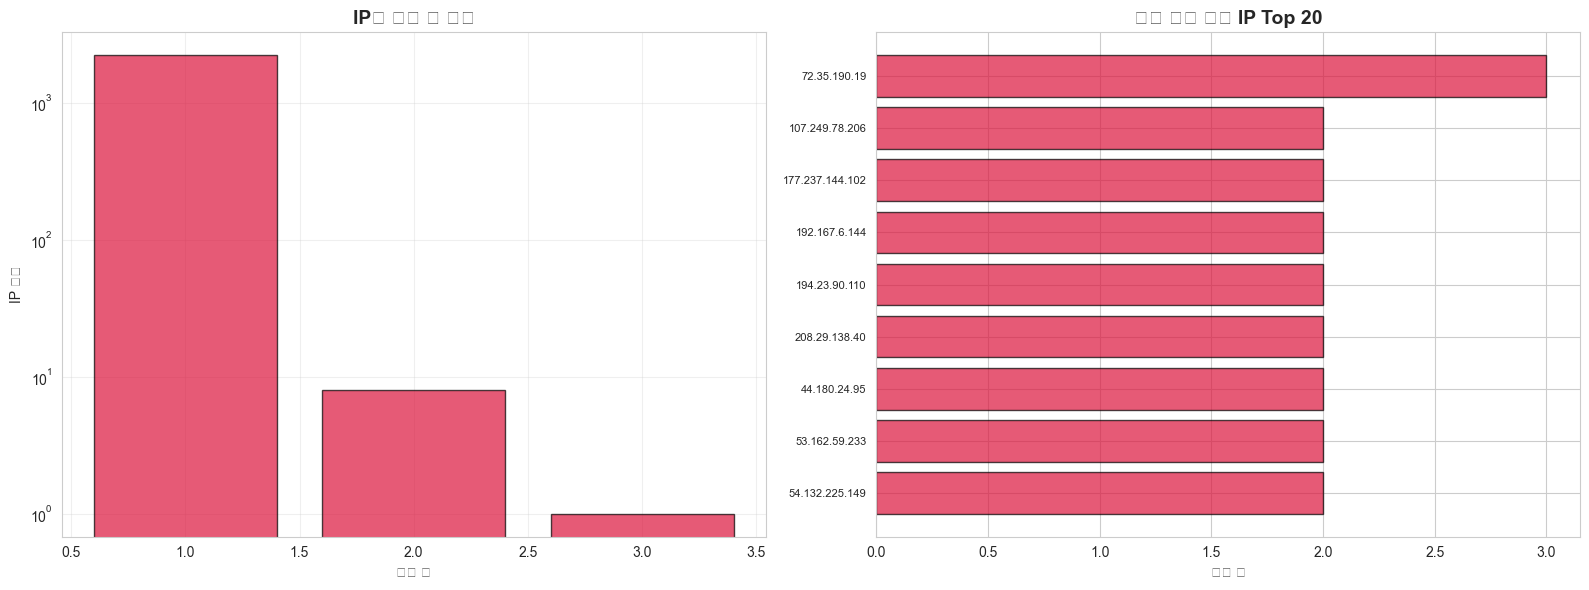


🚨 의심 사례: 9 개의 IP가 2개 이상의 계정 사용


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# IP별 계정 수 분포
ip_account_counts = ip_df.groupby('ip')['account_id'].count()
count_distribution = ip_account_counts.value_counts().sort_index()

axes[0].bar(count_distribution.index, count_distribution.values, color='crimson', alpha=0.7, edgecolor='black')
axes[0].set_title('IP당 계정 수 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('계정 수')
axes[0].set_ylabel('IP 개수')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# 다중 계정 IP Top 20
multi_account_ips = ip_account_counts[ip_account_counts > 1].sort_values(ascending=False).head(20)
axes[1].barh(range(len(multi_account_ips)), multi_account_ips.values, color='crimson', alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(multi_account_ips)))
axes[1].set_yticklabels(multi_account_ips.index, fontsize=8)
axes[1].set_title('다중 계정 사용 IP Top 20', fontsize=14, fontweight='bold')
axes[1].set_xlabel('계정 수')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\n 의심 사례: {len(ip_account_counts[ip_account_counts > 1])} 개의 IP가 2개 이상의 계정 사용")

## 5. 초기 이상 패턴 탐지

### 5.1 Funding Fee 어뷰저 탐지

In [ ]:
print(" Funding Fee 어뷰저 탐지")
print("=" * 80)

# 계정별 펀딩피 수익 계산
funding_analysis = funding_df.groupby('account_id')['funding_fee'].agg([
    ('총_펀딩수익', 'sum'),
    ('펀딩_수취', lambda x: x[x > 0].sum()),
    ('펀딩_지불', lambda x: abs(x[x < 0].sum())),
    ('펀딩_횟수', 'count')
]).reset_index()

# 수익/손실 비율 계산
funding_analysis['수익손실_비율'] = funding_analysis.apply(
    lambda x: x['펀딩_수취'] / x['펀딩_지불'] if x['펀딩_지불'] > 0 else x['펀딩_수취'], 
    axis=1
)

# 의심 기준: 총 펀딩 수익 >= $10 AND 수익/손실 비율 >= 5
funding_abusers = funding_analysis[
    (funding_analysis['총_펀딩수익'] >= 10) & 
    (funding_analysis['수익손실_비율'] >= 5)
].sort_values('총_펀딩수익', ascending=False)

print(f"✓ 탐지된 의심 계정 수: {len(funding_abusers)}")
print(f"✓ 총 의심 펀딩 수익: ${funding_abusers['총_펀딩수익'].sum():,.2f}")
print("\nTop 10 의심 계정:")
print(funding_abusers.head(10))

🔍 Funding Fee 어뷰저 탐지
✓ 탐지된 의심 계정 수: 11
✓ 총 의심 펀딩 수익: $53,236.72

Top 10 의심 계정:
      account_id       총_펀딩수익        펀딩_수취      펀딩_지불  펀딩_횟수     수익손실_비율
32  A_7e27164ab6 45324.856859 46179.090089 854.233230   2229   54.059112
2   A_0bfb0b4311  2721.490922  3244.614820 523.123898   2620    6.202383
11  A_33849d660b  1923.868628  2069.674466 145.805837   1687   14.194730
36  A_89cf7b96c2  1413.044091  1413.044091   0.000000    675 1413.044091
6   A_1f97e16953   980.233207  1185.411120 205.177913     17    5.777479
12  A_359a23d0bd   318.503436   395.199554  76.696117    166    5.152797
54  A_e7205c325a   238.256244   252.315267  14.059022     69   17.946857
44  A_b2bc71e131   114.116125   117.482069   3.365944    402   34.903151
52  A_dcd87c6c96    98.267604   115.666071  17.398467     58    6.648061
26  A_60a63690ae    56.377295    58.141744   1.764449    798   32.951781


### 5.2 조직적 거래 탐지

In [ ]:
print(" 조직적 거래 패턴 탐지")
print("=" * 80)

# 포지션별 유지 시간 계산
positions = trade_df.sort_values(['position_id', 'ts'])
position_pairs = []

for pos_id, group in positions.groupby('position_id'):
    if len(group) >= 2:
        opens = group[group['openclose'] == 'OPEN']
        closes = group[group['openclose'] == 'CLOSE']
        
        if len(opens) > 0 and len(closes) > 0:
            open_time = opens['ts'].iloc[0]
            close_time = closes['ts'].iloc[0]
            duration_minutes = (close_time - open_time).total_seconds() / 60
            
            position_pairs.append({
                'account_id': group['account_id'].iloc[0],
                'position_id': pos_id,
                'leverage': opens['leverage'].iloc[0],
                'duration_minutes': duration_minutes,
                'symbol': group['symbol'].iloc[0]
            })

position_df = pd.DataFrame(position_pairs)

# 계정별 통계
organized_analysis = position_df.groupby('account_id').agg({
    'position_id': 'count',
    'leverage': 'mean',
    'duration_minutes': lambda x: (x <= 5).sum() / len(x) * 100,  # 5분 이내 거래 비율
    'symbol': 'nunique'
}).reset_index()

organized_analysis.columns = ['account_id', '거래횟수', '평균_레버리지', '빠른거래_비율(%)', '거래종목수']

# 의심 기준: 평균 레버리지 >= 50 OR 빠른 거래 비율 >= 30%
organized_traders = organized_analysis[
    (organized_analysis['평균_레버리지'] >= 50) | 
    (organized_analysis['빠른거래_비율(%)'] >= 30)
].sort_values('평균_레버리지', ascending=False)

print(f"✓ 탐지된 의심 계정 수: {len(organized_traders)}")
print(f"✓ 평균 레버리지 50배 이상: {len(organized_analysis[organized_analysis['평균_레버리지'] >= 50])}")
print(f"✓ 빠른 거래 비율 30% 이상: {len(organized_analysis[organized_analysis['빠른거래_비율(%)'] >= 30])}")
print("\nTop 10 의심 계정:")
print(organized_traders.head(10))

🔍 조직적 거래 패턴 탐지
✓ 탐지된 의심 계정 수: 39
✓ 평균 레버리지 50배 이상: 8
✓ 빠른 거래 비율 30% 이상: 38

Top 10 의심 계정:
      account_id  거래횟수    평균_레버리지  빠른거래_비율(%)  거래종목수
56  A_e7205c325a    81 100.000000   72.839506      2
54  A_dcd87c6c96    84  98.821429   72.619048      2
36  A_853f70d58b   144  85.583333   93.750000      5
24  A_59b90616d6   737  83.058345   76.526459     23
16  A_3cfd9478f0   152  73.335526   53.289474      7
8   A_27fd29fd55    69  64.492754   28.985507      4
58  A_e95b2c5030    35  62.828571  100.000000     12
32  A_78e950c1a2   337  61.673591   96.142433     14
48  A_c668740478   522  48.628352   36.015326      3
43  A_9a5e1e7fac  1016  45.636811   41.535433     41


### 5.3 Bonus 어뷰저 탐지

In [ ]:
print(" Bonus 어뷰저 탐지 (다중 계정)")
print("=" * 80)

# 동일 IP 계정 그룹 분석
ip_groups = ip_df.groupby('ip')['account_id'].apply(list).reset_index()
ip_groups['계정수'] = ip_groups['account_id'].apply(len)

# 2개 이상 계정 사용 IP
multi_account = ip_groups[ip_groups['계정수'] >= 2].copy()

# 각 IP 그룹의 총 보상액 계산
multi_account['총_보상액'] = multi_account['account_id'].apply(
    lambda accounts: reward_df[reward_df['account_id'].isin(accounts)]['reward_amount'].sum()
)

multi_account = multi_account.sort_values('총_보상액', ascending=False)

print(f"✓ 다중 계정 사용 IP 수: {len(multi_account)}")
print(f"✓ 총 의심 보상액: ${multi_account['총_보상액'].sum():,.2f}")
print("\nTop 10 의심 IP:")
print(multi_account[['ip', '계정수', '총_보상액']].head(10))

🔍 Bonus 어뷰저 탐지 (다중 계정)
✓ 다중 계정 사용 IP 수: 9
✓ 총 의심 보상액: $1,849.94

Top 10 의심 IP:
                   ip  계정수       총_보상액
727   177.237.144.102    2 1132.924161
1037    208.29.138.40    2  349.544820
1654     44.180.24.95    2  159.991358
1749    53.162.59.233    2  136.116652
1756   54.132.225.149    2   51.365076
880     192.167.6.144    2   10.000000
902     194.23.90.110    2   10.000000
89     107.249.78.206    2    0.000000
1955     72.35.190.19    3    0.000000


## 6. 종합 요약

In [ ]:
print("" * 80)
print(" 데이터 분석 종합 요약")
print("" * 80)

summary = f"""
1. 데이터 규모
   - 총 거래 건수: {len(trade_df):,}
   - 총 펀딩 기록: {len(funding_df):,}
   - 총 보상 지급: {len(reward_df):,}
   - 고유 계정 수: {trade_df['account_id'].nunique():,}
   - 분석 기간: {(trade_df['ts'].max() - trade_df['ts'].min()).days} 일

2. 이상 패턴 탐지 결과
   - Funding Fee 어뷰저: {len(funding_abusers)} 계정
   - 조직적 거래: {len(organized_traders)} 계정
   - Bonus 어뷰저 (다중 계정): {len(multi_account)} IP

3. 금액 규모
   - 총 펀딩피 (Net): ${funding_df['funding_fee'].sum():,.2f}
   - 총 보상액: ${reward_df['reward_amount'].sum():,.2f}
   - 의심 펀딩 수익: ${funding_abusers['총_펀딩수익'].sum():,.2f}
   - 의심 보상액: ${multi_account['총_보상액'].sum():,.2f}

4. 주요 발견사항
   - 펀딩 시점(0시, 8시, 16시) 전후로 거래 집중도 높음
   - 고레버리지 (50배 이상) 거래 다수 발견
   - 동일 IP에서 다중 계정 사용 사례 {len(multi_account)} 건
   - 5분 이내 빠른 거래 패턴 다수 관찰
"""

print(summary)


📊 데이터 분석 종합 요약


1. 데이터 규모
   - 총 거래 건수: 52,953
   - 총 펀딩 기록: 52,694
   - 총 보상 지급: 198
   - 고유 계정 수: 63
   - 분석 기간: 244 일

2. 이상 패턴 탐지 결과
   - Funding Fee 어뷰저: 11 계정
   - 조직적 거래: 39 계정
   - Bonus 어뷰저 (다중 계정): 9 IP

3. 금액 규모
   - 총 펀딩피 (Net): $13,335.05
   - 총 보상액: $7,713.75
   - 의심 펀딩 수익: $53,236.72
   - 의심 보상액: $1,849.94

4. 주요 발견사항
   - 펀딩 시점(0시, 8시, 16시) 전후로 거래 집중도 높음
   - 고레버리지 (50배 이상) 거래 다수 발견
   - 동일 IP에서 다중 계정 사용 사례 9 건
   - 5분 이내 빠른 거래 패턴 다수 관찰



## 7. 다음 단계

### 7.1 상세 분석 필요 영역
1. 의심 계정별 상세 거래 이력 분석
2. 펀딩 시점 전후 거래 패턴 정밀 분석
3. 계정 간 동시 거래 네트워크 분석
4. 수익/손실 구조 상세 계산

### 7.2 모델링
1. 의심 지수(Suspicion Score) 계산 알고리즘 구현
2. 종합 위험 점수(Risk Score) 산출
3. 머신러닝 기반 이상 탐지 모델

### 7.3 보고서 작성
1. 패턴별 상세 사례 분석
2. 경제적 동기 해석
3. 시장 영향 분석
4. 대응 방안 제시

## 8. 데이터 내보내기 (Optional)

In [28]:
# 의심 계정 리스트 저장
output_path = 'output/'
import os
os.makedirs(output_path, exist_ok=True)

funding_abusers.to_csv(output_path + 'funding_abusers.csv', index=False, encoding='utf-8-sig')
organized_traders.to_csv(output_path + 'organized_traders.csv', index=False, encoding='utf-8-sig')
multi_account.to_csv(output_path + 'bonus_abusers.csv', index=False, encoding='utf-8-sig')

print("✓ 의심 계정 리스트 저장 완료!")
print(f"  - {output_path}funding_abusers.csv")
print(f"  - {output_path}organized_traders.csv")
print(f"  - {output_path}bonus_abusers.csv")

✓ 의심 계정 리스트 저장 완료!
  - output/funding_abusers.csv
  - output/organized_traders.csv
  - output/bonus_abusers.csv
